In [ ]:
#FORECASTING-predicting something w.r.t time
#REGRESSION-predicting one entity w.r.t other
#FORECASTING VEGETABLE PRICES
#1 Quintal-100 kgs
#1 ton-1000 kgs
#FB PROPHET-tool/library used here

In [ ]:
#1.Take the data and create dataframe
import pandas as pd
df=pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800
4187,17/Sep/2022,BANGALORE,13200,1600,2000,1800


In [ ]:
df.shape

(4189, 6)

In [ ]:
df.size

25134

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4188 non-null   object
 1   Market                4189 non-null   object
 2   Arrival(q)            4189 non-null   int64 
 3   Price Minimum (Rs/q)  4189 non-null   object
 4   Price Maximum (Rs/q)  4189 non-null   object
 5   Modal Price (Rs/q)    4189 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.5+ KB


In [ ]:
#let us check the null values
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#Dropping all the null values
df=df.dropna()
df


,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4183,04/Jun/2022,BANGALORE,9670,2400,2800,2400
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800


In [27]:
#FB PROPHET-it only accepts data in the form of 2 columns-ds and y
#ds-relation of time,y-relation of price
#let us rename the date column as ds and modal price column as price
df=df.rename(columns={'Modal Price (Rs/q)':'y','Date':'ds'})

In [29]:
#Now let us create a new dataframe and consider only ds and y from old df
df1=df[['ds','y']]
df1


,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4183,04/Jun/2022,2400
4184,08/Jul/2022,2700
4185,11/Jul/2022,2700
4186,14/Sep/2022,1800


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4188 non-null   object
 1   y       4188 non-null   object
dtypes: object(2)
memory usage: 98.2+ KB


In [31]:
#The data type of both ds and y are in object/string format
#let us convert the data type of column to datetime format
#Now let us convert the data type of y column into integer format
df1['ds']=pd.to_datetime(df['ds'])
df1['y']=df1['y'].astype(int)


<ipython-input-31-b10595084658>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ds']=pd.to_datetime(df['ds'])
<ipython-input-31-b10595084658>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y']=df1['y'].astype(int)


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4188 non-null   datetime64[ns]
 1   y       4188 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 98.2 KB


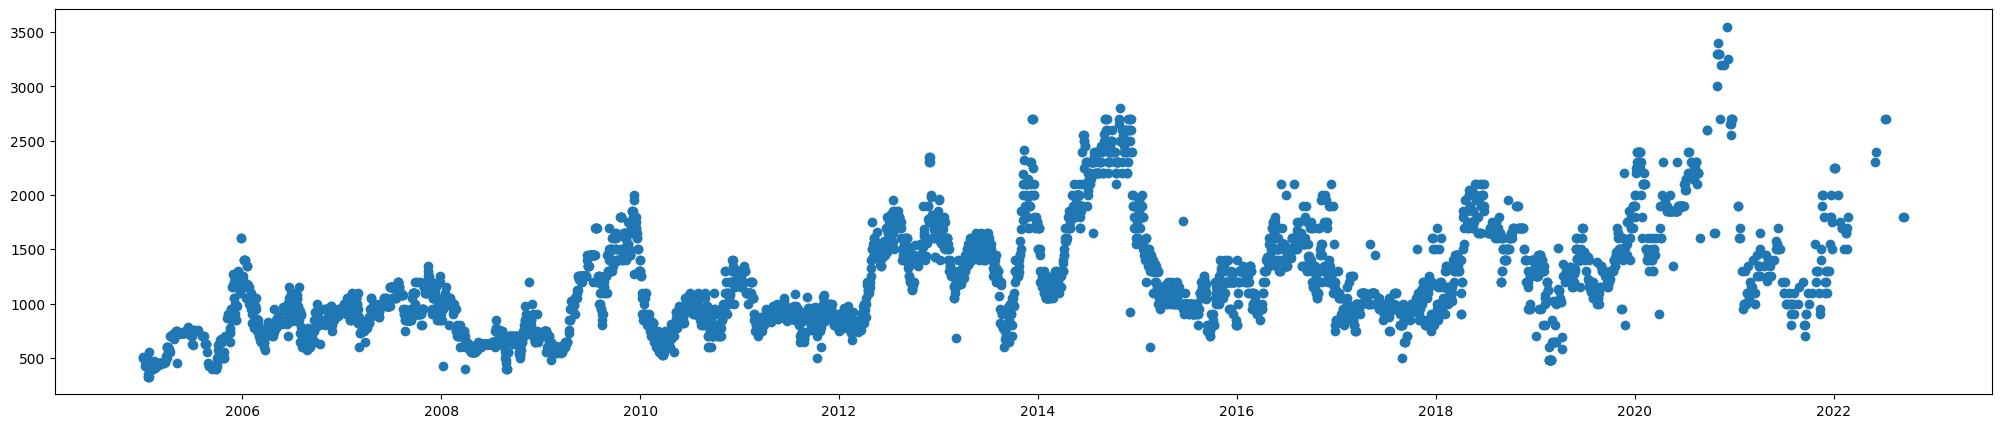

In [33]:
#Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.scatter(df1['ds'],df1['y'])

In [ ]:
#FB PROPHET
import prophet
op=prophet.Prophet()
op.fit(df1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpthercxks/a7bx3phx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpthercxks/qh6t76cp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2016', 'data', 'file=/tmp/tmpthercxks/a7bx3phx.json', 'init=/tmp/tmpthercxks/qh6t76cp.json', 'output', 'file=/tmp/tmpthercxks/prophet_modelommdfj1d/prophet_model-20230720172931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:29:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=op.make_future_dataframe(periods=365,freq='D')
forecast=op.predict(future)

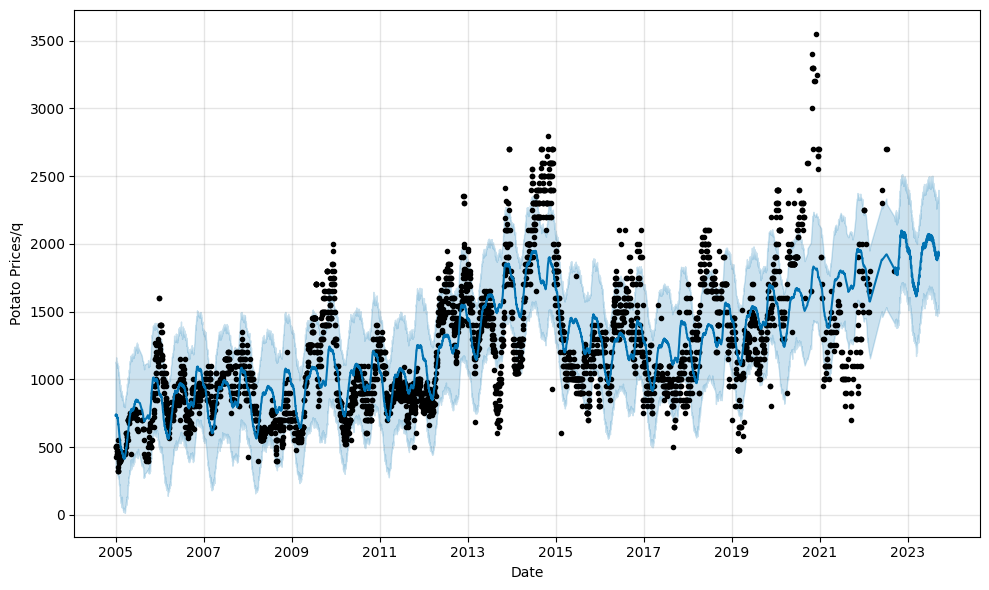

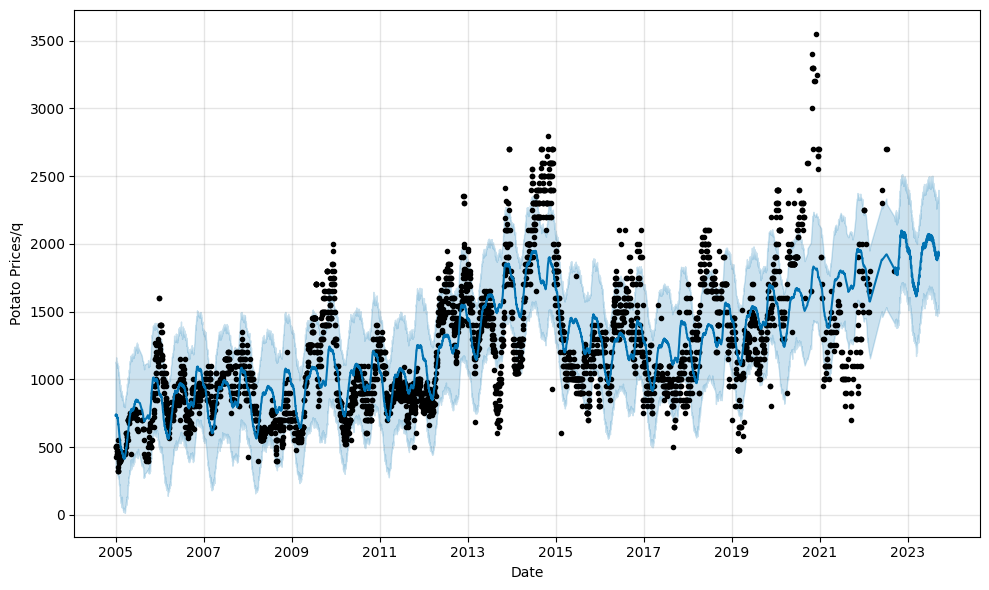

In [38]:
op.plot(forecast,xlabel='Date',ylabel='Potato Prices/q')
